,edad,estado_salud_percibido,ccsr_num_total,ccsr_otra_condicion,sexo_Male,raza_etnicidad_Non-Hispanic Asian only,raza_etnicidad_Non-Hispanic Black only,raza_etnicidad_Non-Hispanic Other race or multi-race,raza_etnicidad_Non-Hispanic White only,estado_civil_Married,...,ccsr_Otitis media,ccsr_Osteoporosis,ccsr_Thyroid disorders,ccsr_Neurodevelopmental disorders,ccsr_Other and ill-defined heart disease,ccsr_Other specified upper respiratory infections,ccsr_Nutritional deficiencies,ccsr_Other specified inflammatory condition of skin,ccsr_General sensation/perception signs and symptoms,prima_out_of_pocket_editada
0,29.0,1,7,5,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,357.50
1,51.0,4,4,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,215.88
2,53.0,4,10,5,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,315.00
3,69.0,4,6,4,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,315.00
4,37.0,4,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,140.44


Columnas: ['edad', 'estado_salud_percibido', 'ccsr_num_total', 'ccsr_otra_condicion', 'sexo_Male', 'raza_etnicidad_Non-Hispanic Asian only', 'raza_etnicidad_Non-Hispanic Black only', 'raza_etnicidad_Non-Hispanic Other race or multi-race', 'raza_etnicidad_Non-Hispanic White only', 'estado_civil_Married', 'estado_civil_Never married', 'estado_civil_Separated', 'estado_civil_Under 16 - not applicable', 'estado_civil_Widowed', 'region_Midwest', 'region_Northeast', 'region_South', 'region_West', 'ccsr_Essential hypertension', 'ccsr_Disorders of lipid metabolism', 'ccsr_Diabetes mellitus without complication', 'ccsr_Bacterial infections', 'ccsr_Osteoarthritis', 'ccsr_Cataract and other lens disorders', 'ccsr_Esophageal disorders', 'ccsr_Retinal and vitreous conditions', 'ccsr_Other general signs and symptoms', 'ccsr_Abnormal findings without diagnosis', 'ccsr_Other specified bone disease and musculoskeletal deformities', 'ccsr_Otitis media', 'ccsr_Osteoporosis', 'ccsr_Thyroid disorders', 'cc

,limite_excelente,limite_bueno,limite_regular
0,100.00000,173.33,300.000
1,150.00000,300.00,500.000
2,151.67000,300.00,500.000
3,116.00000,193.00,346.670
4,115.50125,216.67,435.875



--- Predicción de: limite_excelente ---
Entrenando y ajustando: LinearRegression
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: RandomForest
Entrenando y ajustando: RandomForest
Entrenando y ajustando: XGBoost
Entrenando y ajustando: XGBoost


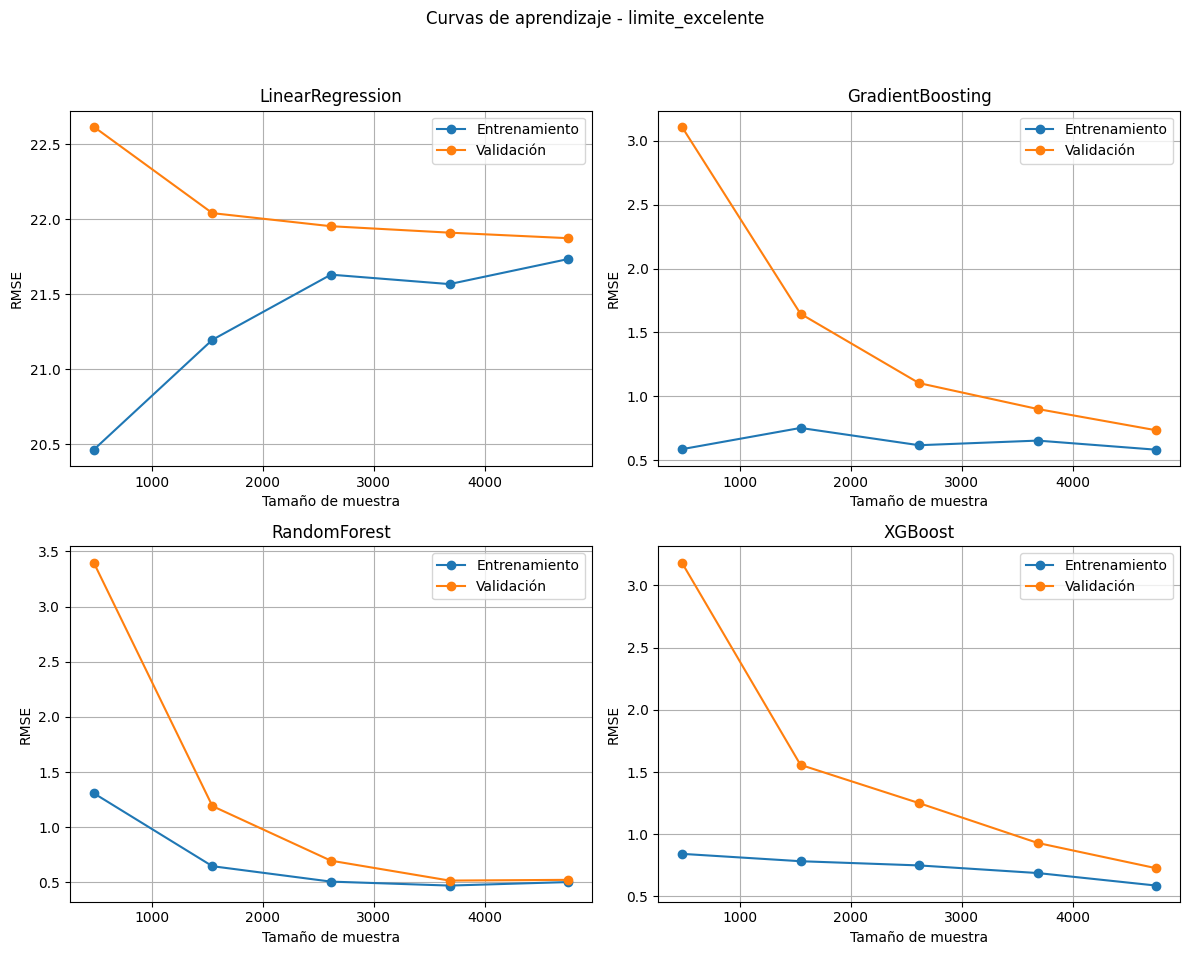

,MAE,RMSE,R2
LinearRegression,16.684966,21.885082,0.724914
GradientBoosting,0.480606,0.667175,0.999744
RandomForest,0.260496,0.510806,0.999850
XGBoost,0.474789,0.647469,0.999759



--- Predicción de: limite_bueno ---
Entrenando y ajustando: LinearRegression
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: RandomForest
Entrenando y ajustando: RandomForest
Entrenando y ajustando: XGBoost
Entrenando y ajustando: XGBoost


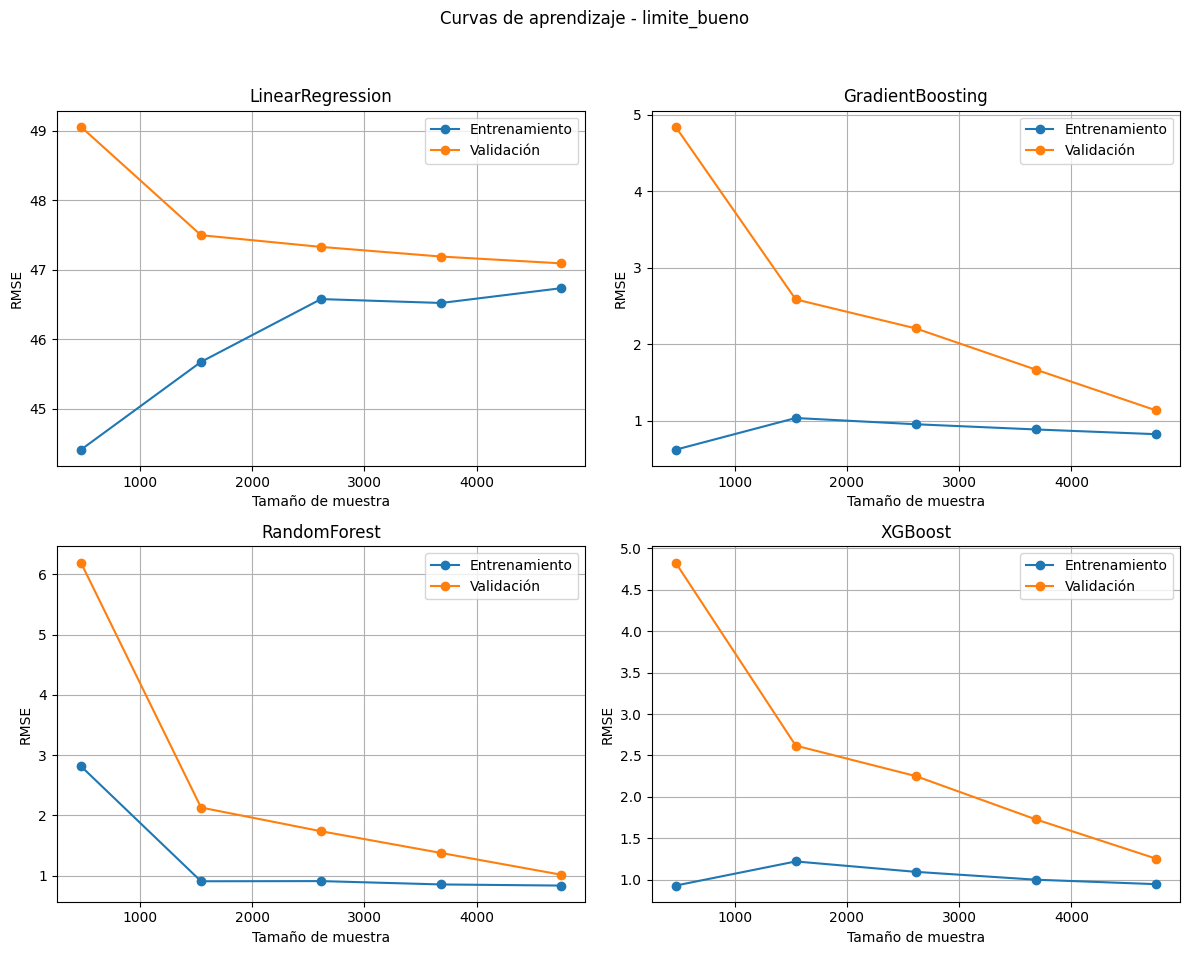

,MAE,RMSE,R2
LinearRegression,36.147016,46.476790,0.557441
GradientBoosting,0.731178,1.073089,0.999764
RandomForest,0.239993,0.734899,0.999889
XGBoost,0.706851,1.031282,0.999782



--- Predicción de: limite_regular ---
Entrenando y ajustando: LinearRegression
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: GradientBoosting
Entrenando y ajustando: RandomForest
Entrenando y ajustando: RandomForest
Entrenando y ajustando: XGBoost
Entrenando y ajustando: XGBoost


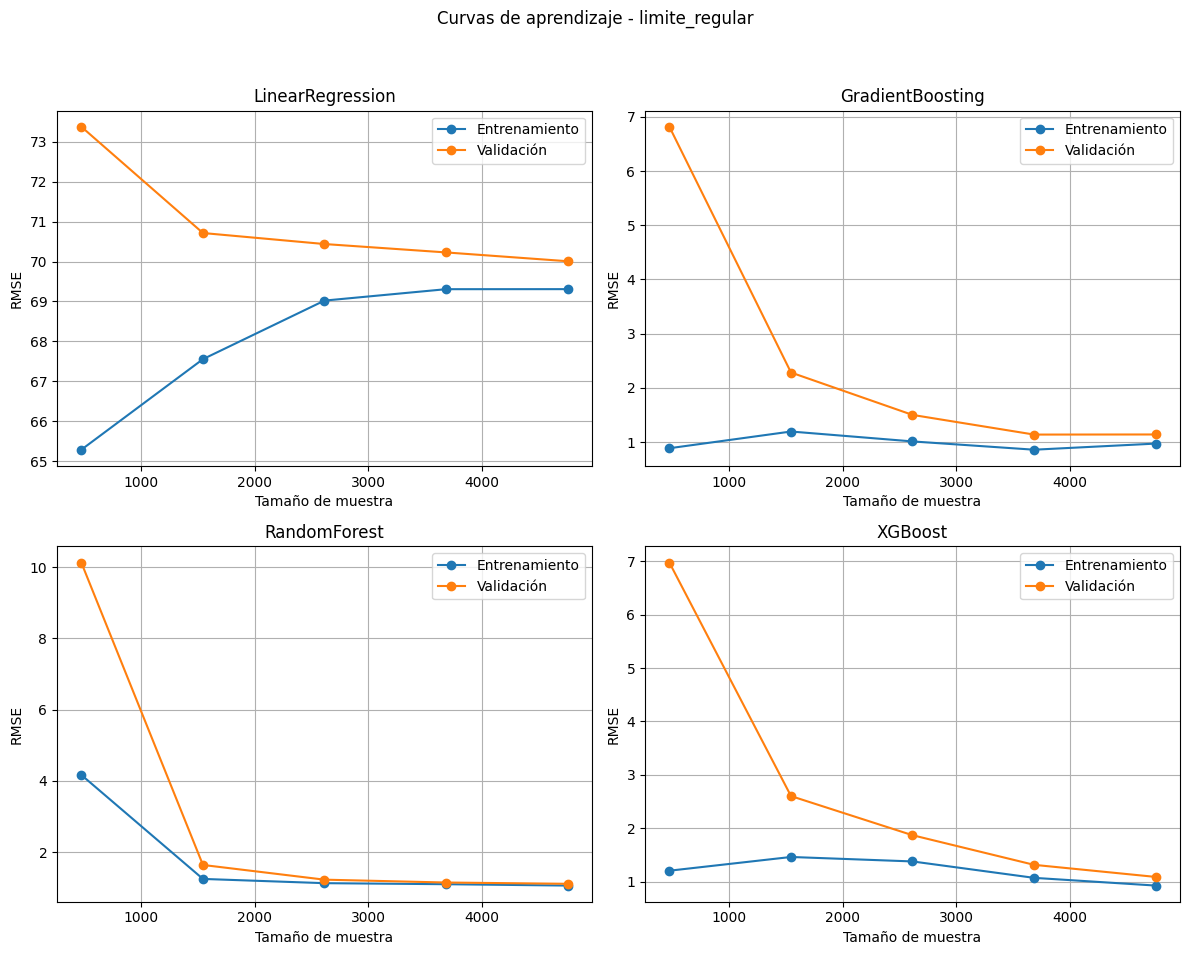

,MAE,RMSE,R2
LinearRegression,56.665085,69.254976,0.353724
GradientBoosting,0.494212,0.715253,0.999931
RandomForest,0.292758,1.075111,0.999844
XGBoost,0.638756,0.916994,0.999887


In [ ]:
# 1. Importar librerías y cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

# Leer el dataset
df = pd.read_csv('../Models/meps_ml_dataset.csv')
display(df.head())
print('Columnas:', df.columns.tolist())

# 2. Crear función para obtener los límites de cada categoría para cada persona
def limites_personalizados(row, df, edad_col='edad', sexo_col='sexo_Male', prima_col='prima_out_of_pocket_editada'):
    edad = row[edad_col]
    sexo = row[sexo_col]
    mask = (df[edad_col].between(edad-3, edad+3)) & (df[sexo_col]==sexo)
    similares = df[mask][prima_col]
    if len(similares) < 10:
        similares = df[prima_col]  # fallback a toda la muestra si hay pocos similares
    q1 = similares.quantile(0.25)
    q2 = similares.quantile(0.5)
    q3 = similares.quantile(0.75)
    return [q1, q2, q3]

# 3. Crear columnas con los límites para cada persona
df[['limite_excelente','limite_bueno','limite_regular']] = df.apply(lambda row: pd.Series(limites_personalizados(row, df)), axis=1)
display(df[['limite_excelente','limite_bueno','limite_regular']].head())

# 4. Definir variables predictoras y variables objetivo (los tres límites)
X = df.drop(columns=['prima_out_of_pocket_editada','limite_excelente','limite_bueno','limite_regular'])
y = df[['limite_excelente','limite_bueno','limite_regular']]

# 5. Eliminar outliers usando z-score (umbral 3) en las variables objetivo
z_scores = np.abs(zscore(y))
mask = (z_scores < 3).all(axis=1)
X = X[mask]
y = y[mask]

# 6. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Definir modelos y grids de hiperparámetros
modelos_dict = {
    'LinearRegression': (LinearRegression(), {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'positive': [False, True]
    }),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }),
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [5, 10]
    })
}
if xgb_available:
    modelos_dict['XGBoost'] = (XGBRegressor(random_state=42, objective='reg:squarederror'), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    })

# 8. Entrenar y comparar modelos para cada límite, graficar 4 curvas en 1 imagen (2x2) y mostrar tabla de métricas
pd.set_option('display.max_colwidth', None)
for target in y.columns:
    print(f'\n--- Predicción de: {target} ---')
    resultados = {}
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for i, (nombre, (modelo, param_grid)) in enumerate(modelos_dict.items()):
        print(f'Entrenando y ajustando: {nombre}')
        if param_grid is not None:
            grid = GridSearchCV(modelo, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
            grid.fit(X_train, y_train[target])
            best_model = grid.best_estimator_
        else:
            modelo.fit(X_train, y_train[target])
            best_model = modelo
        y_pred = best_model.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred)
        rmse = mean_squared_error(y_test[target], y_pred, squared=False)
        r2 = r2_score(y_test[target], y_pred)
        resultados[nombre] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
        # Curva de aprendizaje con MAE
        train_sizes, train_scores, test_scores = learning_curve(
            best_model, X_train, y_train[target], cv=3, scoring='neg_mean_absolute_error',
            train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
        )
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        axs[i].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
        axs[i].plot(train_sizes, test_scores_mean, 'o-', label='Validación')
        axs[i].set_title(f'{nombre}')
        axs[i].set_xlabel('Tamaño de muestra')
        axs[i].set_ylabel('MAE')
        axs[i].legend()
        axs[i].grid(True)
    plt.suptitle(f'Curvas de aprendizaje (MAE) - {target}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    # Mostrar tabla de métricas sin best_params
    df_res = pd.DataFrame(resultados).T[['MAE','RMSE','R2']]
    display(df_res)


--- Predicción de: limite_excelente (sin ajuste de hiperparámetros) ---
Entrenando: LinearRegression
Entrenando: GradientBoosting
Entrenando: RandomForest
Entrenando: RandomForest
Entrenando: XGBoost
Entrenando: XGBoost


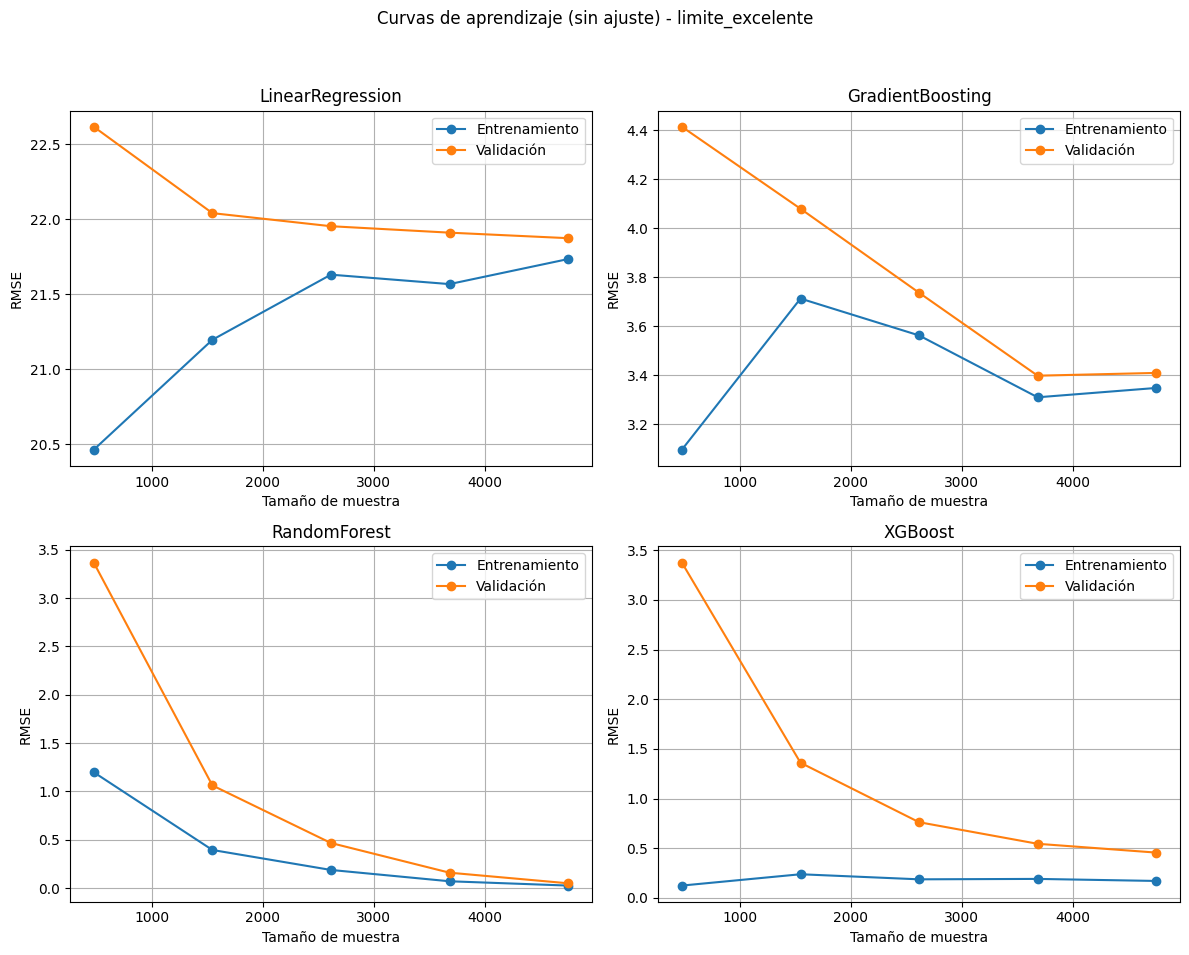

,MAE,RMSE,R2
LinearRegression,16.684966,21.885082,0.724914
GradientBoosting,2.651418,3.355638,0.993533
RandomForest,0.000398,0.004100,1.000000
XGBoost,0.170982,0.297808,0.999949



--- Predicción de: limite_bueno (sin ajuste de hiperparámetros) ---
Entrenando: LinearRegression
Entrenando: GradientBoosting
Entrenando: RandomForest
Entrenando: RandomForest
Entrenando: XGBoost
Entrenando: XGBoost


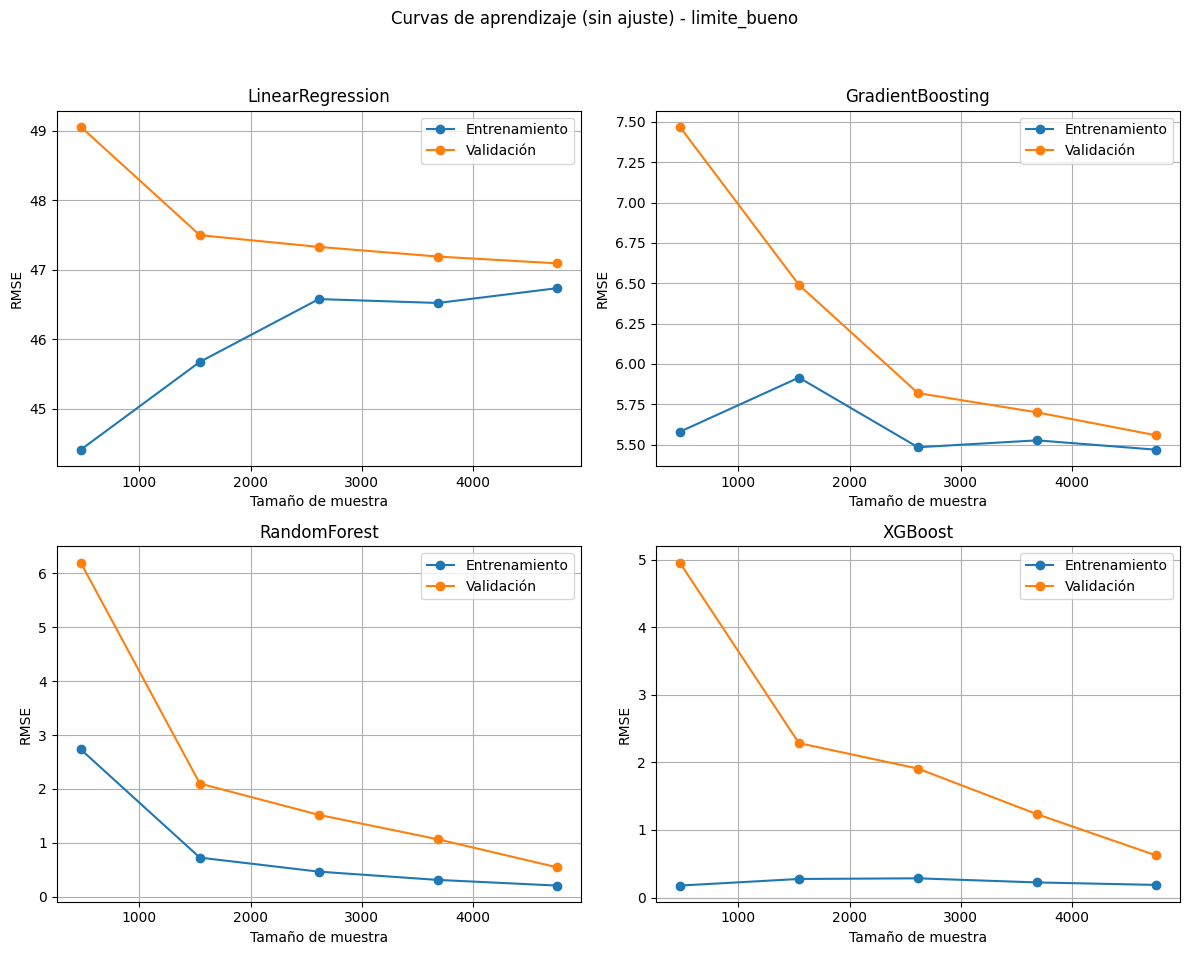

,MAE,RMSE,R2
LinearRegression,36.147016,46.476790,0.557441
GradientBoosting,4.150433,5.700809,0.993342
RandomForest,0.011703,0.129102,0.999997
XGBoost,0.248424,0.526273,0.999943



--- Predicción de: limite_regular (sin ajuste de hiperparámetros) ---
Entrenando: LinearRegression
Entrenando: GradientBoosting
Entrenando: RandomForest
Entrenando: RandomForest
Entrenando: XGBoost
Entrenando: XGBoost


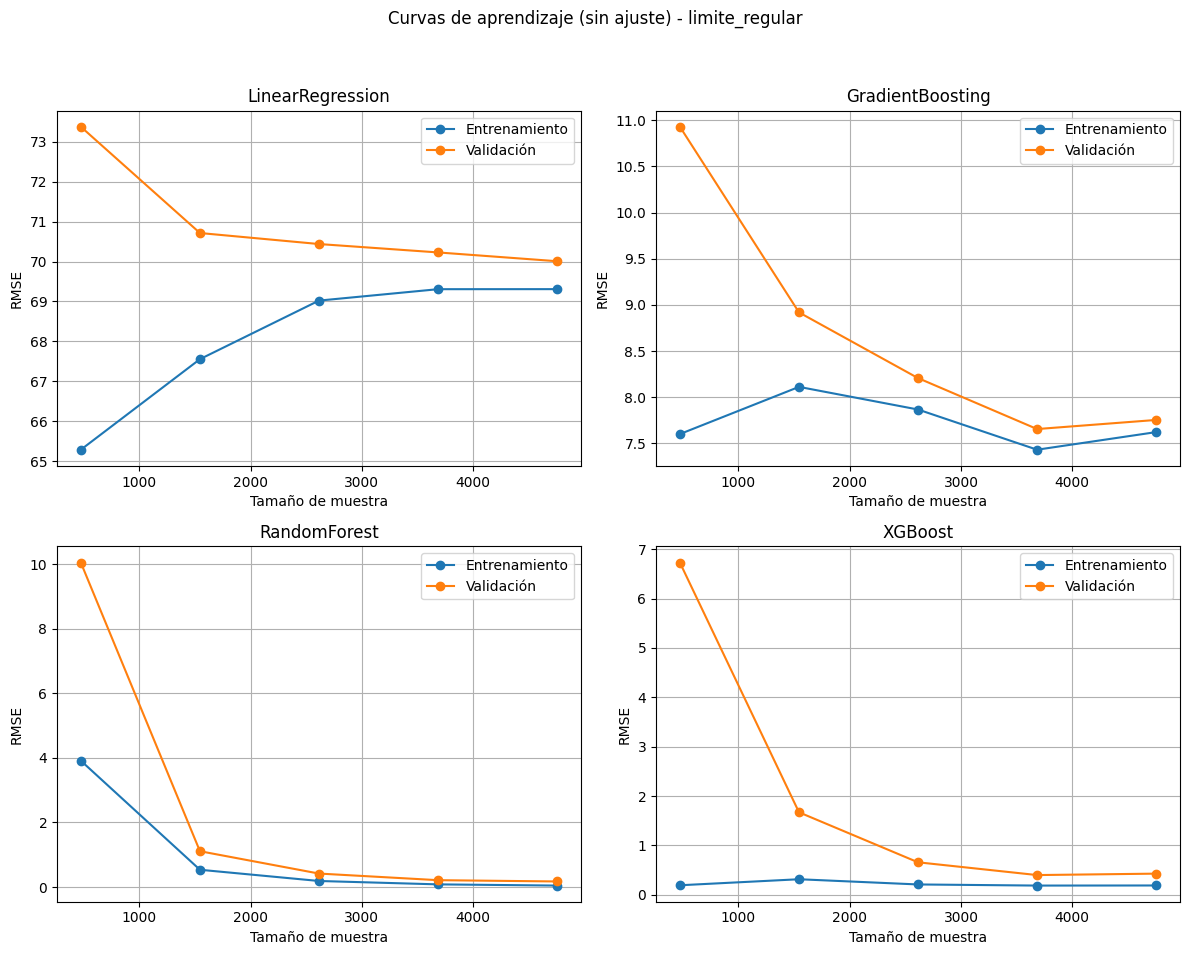

,MAE,RMSE,R2
LinearRegression,56.665085,69.254976,0.353724
GradientBoosting,5.860498,7.787249,0.991829
RandomForest,0.003756,0.086298,0.999999
XGBoost,0.082946,0.135263,0.999998


In [ ]:
# Entrenamiento y visualización SIN ajuste de hiperparámetros (modelos por defecto)
from copy import deepcopy

modelos_sin_grid = {
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}
if xgb_available:
    modelos_sin_grid['XGBoost'] = XGBRegressor(random_state=42, objective='reg:squarederror')

for target in y.columns:
    print(f'\n--- Predicción de: {target} (sin ajuste de hiperparámetros) ---')
    resultados = {}
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for i, (nombre, modelo) in enumerate(modelos_sin_grid.items()):
        print(f'Entrenando: {nombre}')
        modelo_ = deepcopy(modelo)
        modelo_.fit(X_train, y_train[target])
        y_pred = modelo_.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred)
        rmse = mean_squared_error(y_test[target], y_pred, squared=False)
        r2 = r2_score(y_test[target], y_pred)
        resultados[nombre] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
        # Curva de aprendizaje con MAE
        train_sizes, train_scores, test_scores = learning_curve(
            modelo_, X_train, y_train[target], cv=3, scoring='neg_mean_absolute_error',
            train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
        )
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        axs[i].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
        axs[i].plot(train_sizes, test_scores_mean, 'o-', label='Validación')
        axs[i].set_title(f'{nombre}')
        axs[i].set_xlabel('Tamaño de muestra')
        axs[i].set_ylabel('MAE')
        axs[i].legend()
        axs[i].grid(True)
    plt.suptitle(f'Curvas de aprendizaje (MAE, sin ajuste) - {target}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    # Mostrar tabla de métricas
    df_res = pd.DataFrame(resultados).T[['MAE','RMSE','R2']]
    display(df_res)
